In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
 

import warnings
warnings.filterwarnings("ignore")

In [2]:
#create PrepDataset.py based on 894_project.py from our github 
import PrepDataset

(13230001, 24)
['level_0', 'level_1', 'TS1', 'TS2', 'TS3', 'TS4', 'VS1', 'CE', 'CP', 'SE', 'FS1', 'FS2', 'PS1', 'PS2', 'PS3', 'PS4', 'PS5', 'PS6', 'EPS1', 'Cooler_efficiency', 'Valve_response', 'Pump_leakage', 'Accumulator_pressure', 'Instability_flag']
   level_0  level_1    TS1     TS2    TS3     TS4    VS1      CE     CP  \
0      0.0      0.0  35.57  40.961  38.32  30.363  0.604  47.202  2.184   
1      0.0      0.0  35.57  40.961  38.32  30.363  0.604  47.202  2.184   
2      0.0      0.0  35.57  40.961  38.32  30.363  0.604  47.202  2.184   
3      0.0      0.0  35.57  40.961  38.32  30.363  0.604  47.202  2.184   
4      0.0      0.0  35.57  40.961  38.32  30.363  0.604  47.202  2.184   

       SE   FS1     FS2     PS1     PS2    PS3  PS4    PS5    PS6    EPS1  \
0  68.039  8.99  10.179  151.47  125.50  2.305  0.0  9.936  9.818  2411.6   
1  68.039  8.99  10.179  151.45  125.39  2.305  0.0  9.947  9.823  2411.6   
2  68.039  8.99  10.179  151.52  125.40  2.336  0.0  9.964  9.84

In [3]:
from PrepDataset import df,df_profile 

[  3  20 100]
[100  73  80  90]
[0 2 1]
[130 115 100  90]
[1 0]


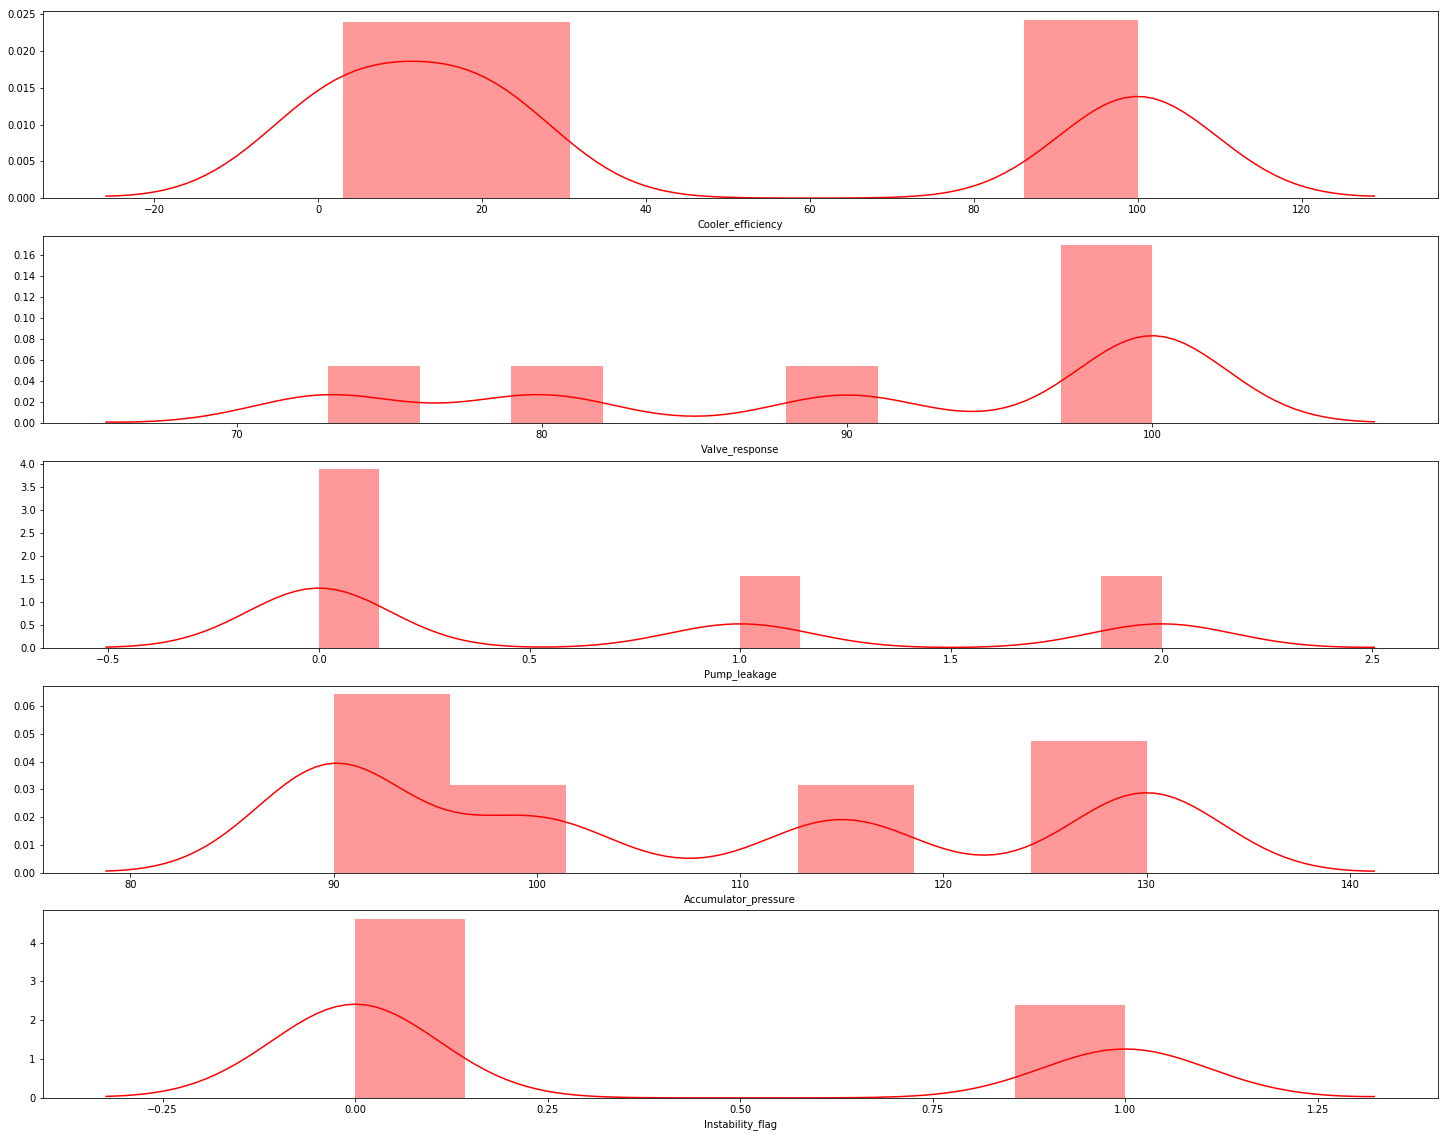

In [4]:
#explore dataset
for i in enumerate(list(df_profile.columns)):
    print(pd.unique(df_profile[i[1]]))

# Construct 5 subplots for the 5 target variables    
figure,(ax1, ax2,ax3,ax4,ax5) = plt.subplots(figsize=(25, 20 ), 
                       nrows=df_profile.shape[1], ncols=1,sharex = False)
sns.distplot(df_profile['Cooler_efficiency'], hist=True, color = 'red',ax=ax1)
sns.distplot(df_profile['Valve_response'], hist=True,color = 'red',ax=ax2)
sns.distplot(df_profile['Pump_leakage'], hist=True, color = 'red',ax=ax3)
sns.distplot(df_profile['Accumulator_pressure'], hist=True,color = 'red',ax=ax4)
sns.distplot(df_profile['Instability_flag'], hist=True, color = 'red',ax=ax5)

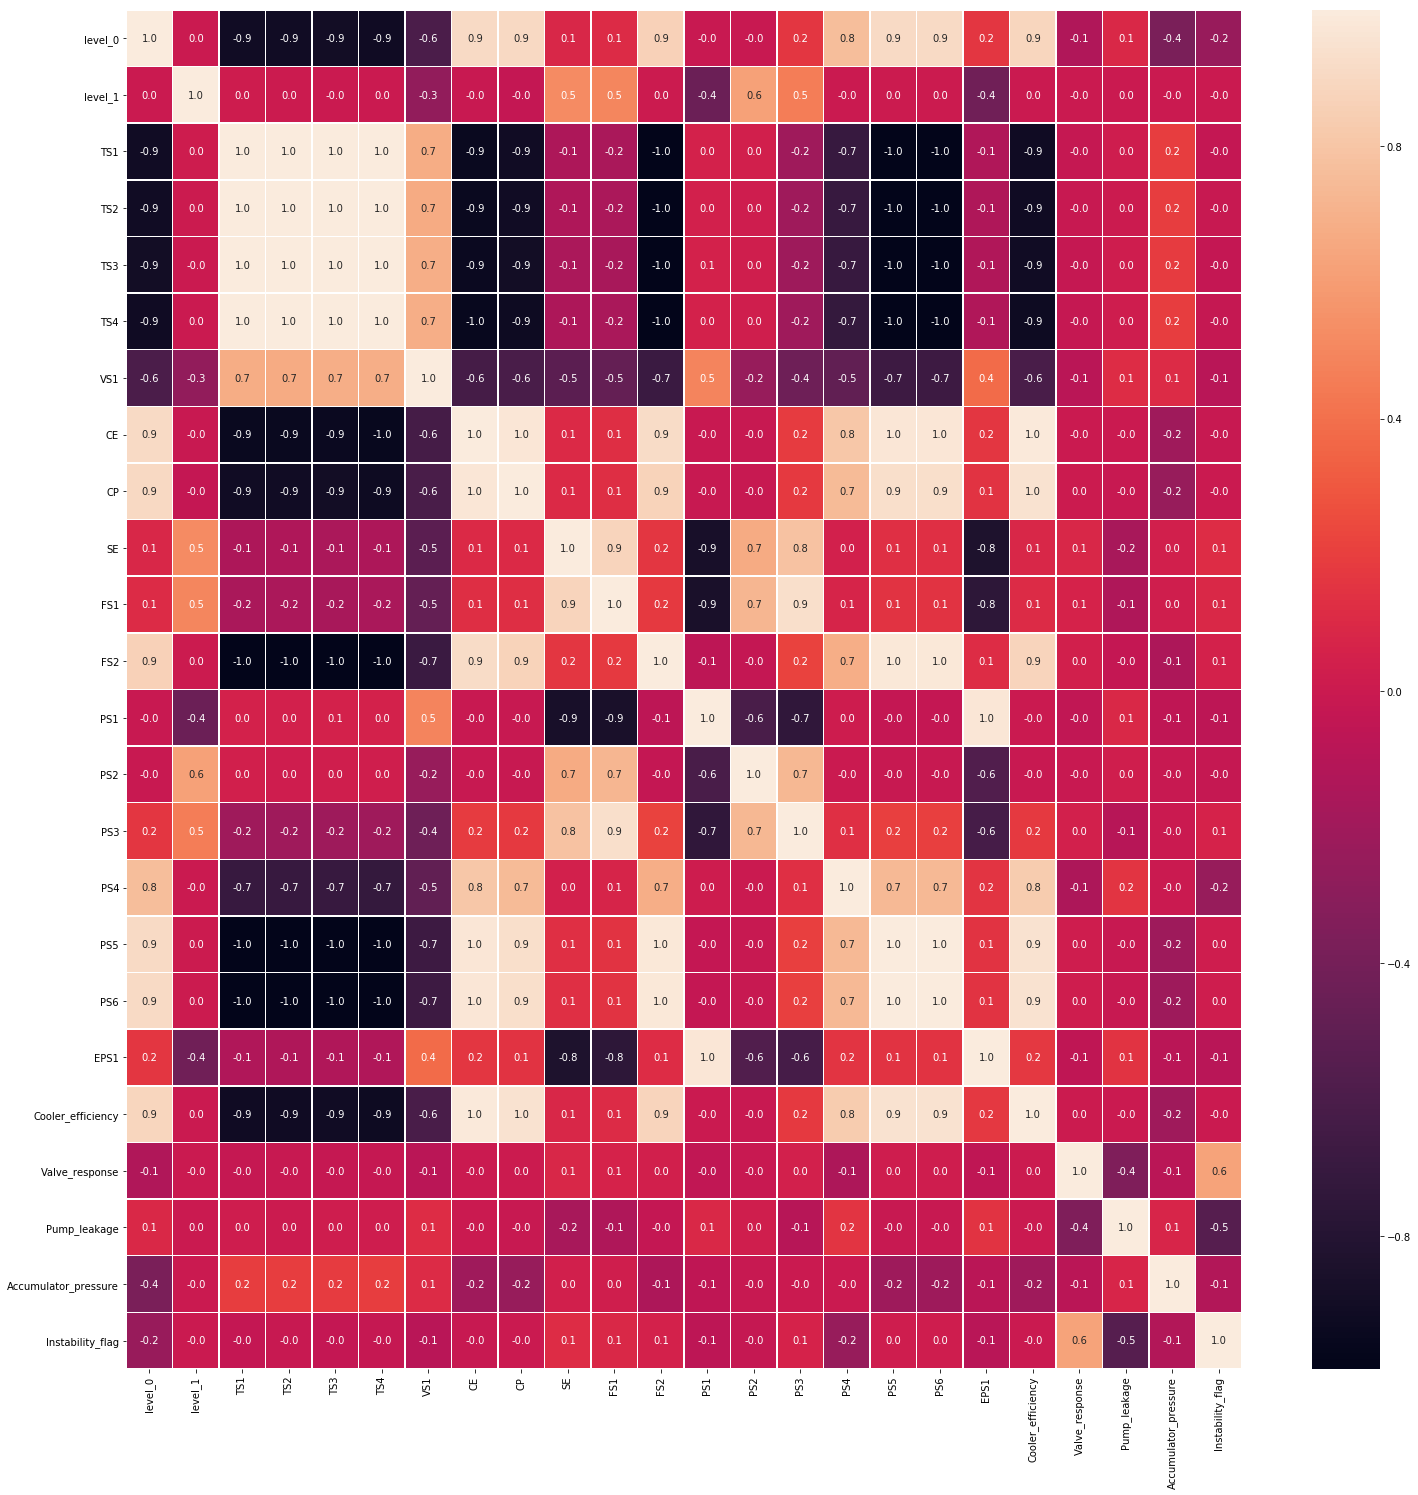

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

#check corelation between features
# df.corr()
f,ax = plt.subplots(figsize=(25, 25))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

In [16]:
df.columns

Index(['level_0', 'level_1', 'TS1', 'TS2', 'TS3', 'TS4', 'VS1', 'CE', 'CP',
       'SE', 'FS1', 'FS2', 'PS1', 'PS2', 'PS3', 'PS4', 'PS5', 'PS6', 'EPS1',
       'Cooler_efficiency', 'Valve_response', 'Pump_leakage',
       'Accumulator_pressure', 'Instability_flag'],
      dtype='object')

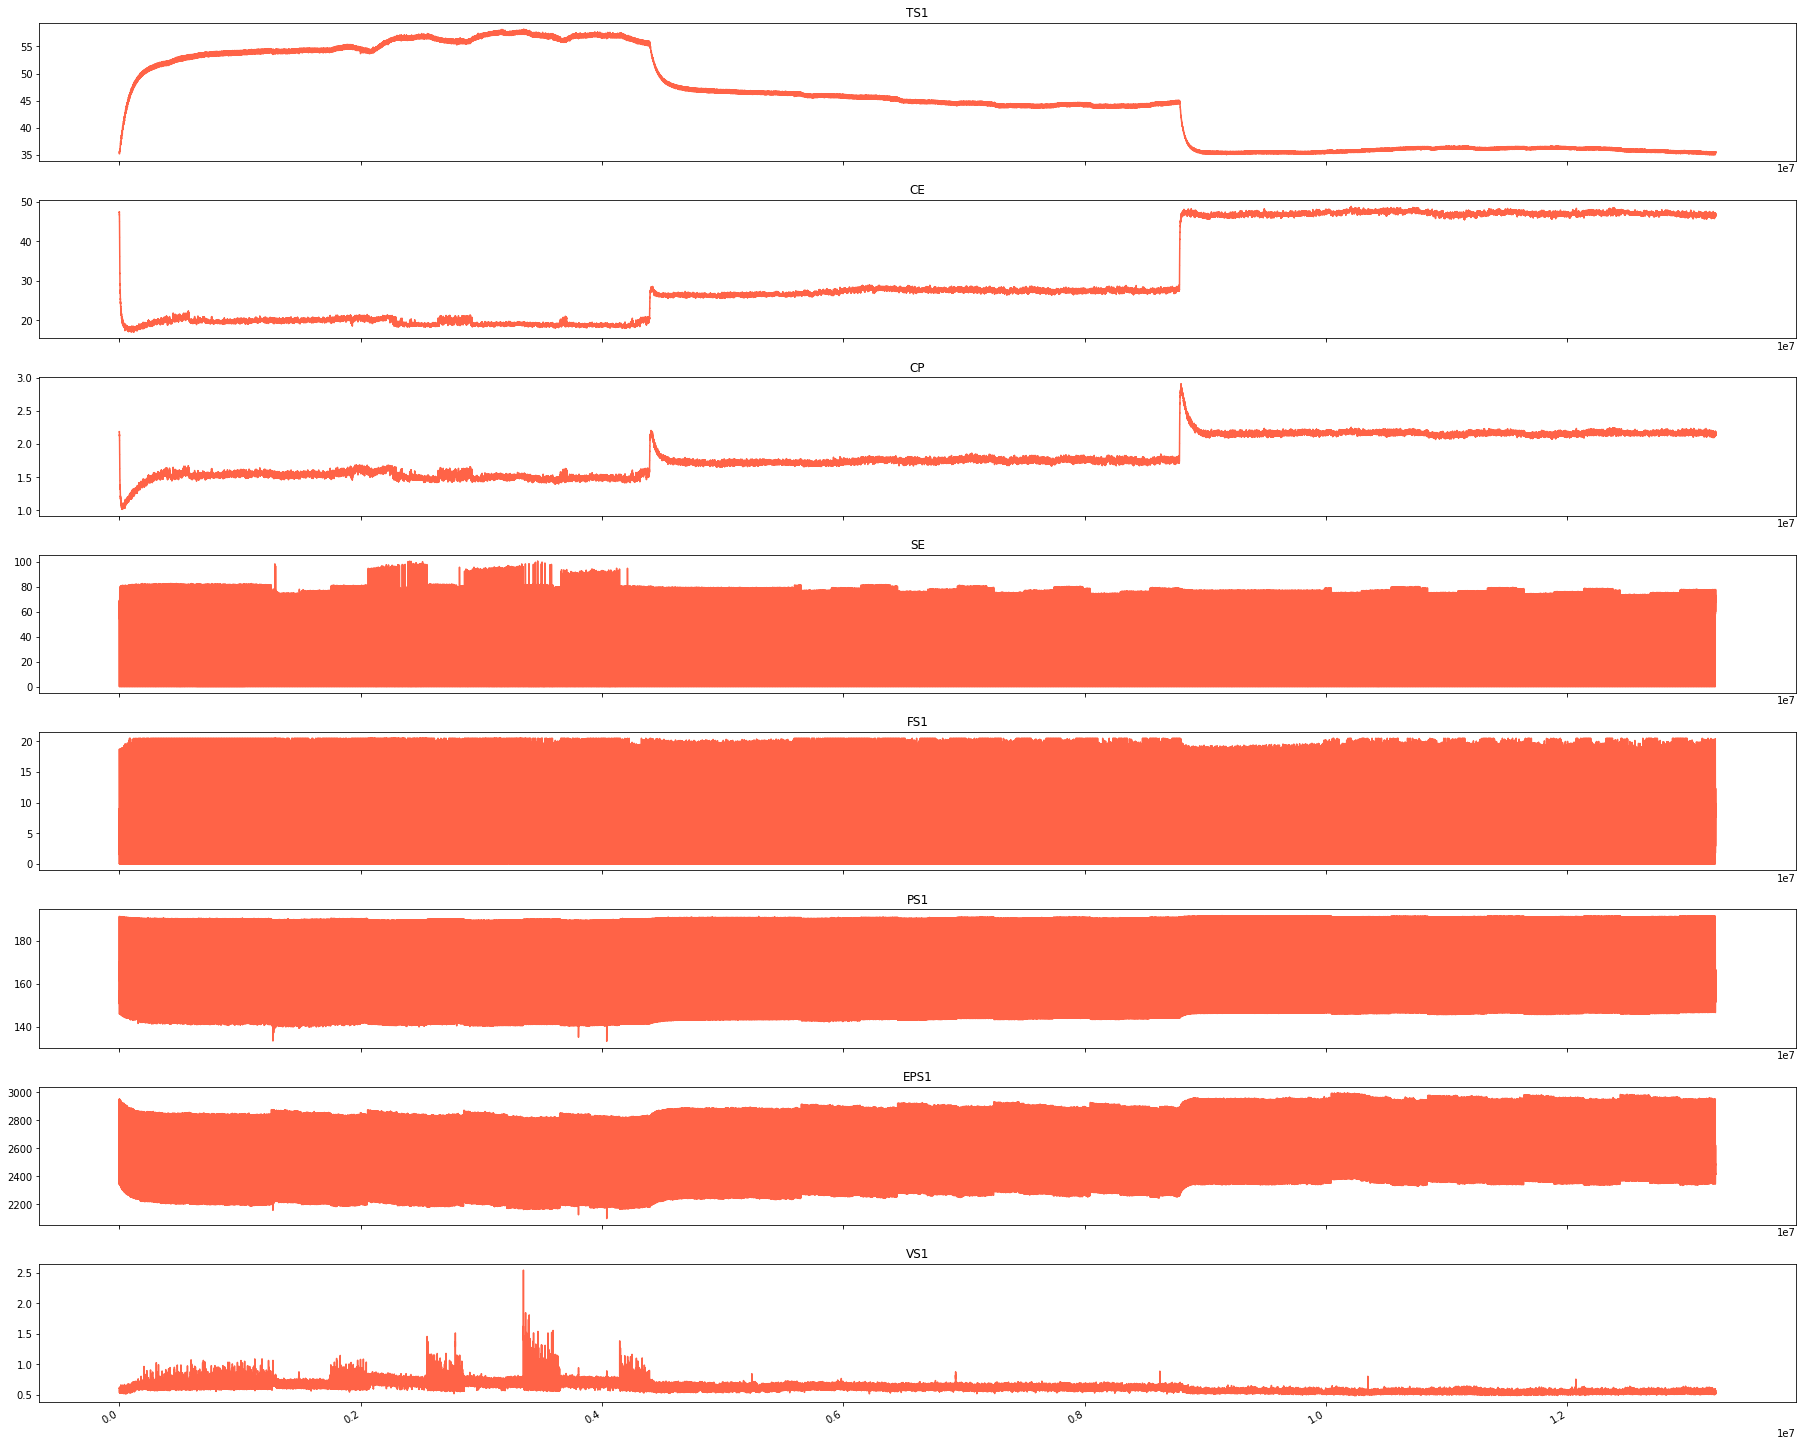

In [81]:
figure,(ax1, ax2,ax3,ax4,ax5,ax6,ax7,ax8) = plt.subplots(figsize=(25, 20 ), 
                       nrows=8, ncols=1,sharex = False)
df['TS1'].plot(subplots=True, sharex=True,color='tomato',ax=ax1 ) 
ax1.set_title('TS1')
df['CE'].plot(subplots=True, sharex=True,color='tomato',ax=ax2 ) 
ax2.set_title('CE') 
df['CP'].plot(subplots=True, sharex=True,color='tomato',ax=ax3 ) 
ax3.set_title('CP') 
df['SE'].plot(subplots=True, sharex=True,color='tomato',ax=ax4 ) 
ax4.set_title('SE') 
df['FS1'].plot(subplots=True, sharex=True,color='tomato',ax=ax5 ) 
ax5.set_title('FS1') 
df['PS1'].plot(subplots=True, sharex=True,color='tomato',ax=ax6 ) 
ax6.set_title('PS1') 
df['EPS1'].plot(subplots=True, sharex=True,color='tomato',ax=ax7 ) 
ax7.set_title('EPS1') 
df['VS1'].plot(subplots=True, sharex=True,color='tomato',ax=ax8 ) 
ax8.set_title('VS1') 
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()